In [40]:
from matplotlib.ticker import PercentFormatter

In [1]:
# Importing libraries
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df_original =pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

# Data CLeanup
df_original['job_posted_date']=pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills']=df_original['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

Grouping Job Skills by Month

In [4]:
df_DS_US=df_original[(df_original['job_country']=='United States')&(df_original['job_title_short']=='Data Scientist')]
df_DS_US['job_posted_month']=df_DS_US['job_posted_date'].dt.month
df_DS_US=df_DS_US.explode('job_skills')

C:\Users\ngphu\AppData\Local\Temp\ipykernel_11932\3202614530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DS_US['job_posted_month']=df_DS_US['job_posted_date'].dt.month


Pivot Table in prep for plotting

In [16]:
df_DS_US_pivot=df_DS_US.pivot_table(values=df_DS_US,index='job_posted_month',columns='job_skills',aggfunc='size',fill_value=0)
df_DS_US_pivot.loc['Total']=df_DS_US_pivot.sum()
df_DS_US_pivot=df_DS_US_pivot[df_DS_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_US_pivot=df_DS_US_pivot.drop('Total')
df_DS_US_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,fedora,mattermost,nuix,asp.net core,shogun,clickup,ocaml,wrike,symfony,couchdb
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,5243,3770,3362,1700,1630,1364,1356,916,896,817,...,0,0,1,1,0,1,0,0,1,1
2,3718,2670,2334,1144,1268,854,895,645,565,573,...,0,0,0,0,0,0,0,0,0,0
3,3394,2426,2189,1144,1126,848,787,575,529,538,...,0,0,0,0,1,0,0,0,0,0
4,3622,2463,2181,1204,1213,882,823,622,582,538,...,0,0,0,0,0,0,0,0,0,0
5,3232,2293,2016,1150,1174,797,774,629,517,521,...,0,0,0,0,0,0,0,0,0,0
6,3431,2442,2107,1158,1135,818,822,586,537,568,...,0,0,0,0,0,0,0,1,0,0
7,3541,2479,2210,1106,1223,860,802,581,570,607,...,1,0,0,0,0,0,0,0,0,0
8,4566,3324,2896,1598,1520,1076,1075,767,809,727,...,0,0,0,0,0,0,0,0,0,0
9,3112,2155,1791,1158,921,697,740,534,567,558,...,0,0,0,0,0,0,0,0,0,0


Calculating percentage of total jobs

In [18]:
DS_total=df_DS_US.groupby('job_posted_month').size()
DS_total

job_posted_month
1     39649
2     27881
3     25739
4     26901
5     25051
6     26151
7     27362
8     34704
9     24051
10    25243
11    21583
12    17975
dtype: int64

In [24]:
df_DS_US_percentage=df_DS_US_pivot.div(DS_total/100,axis=0)

# Changes month from number to name
df_DS_US_percentage=df_DS_US_percentage.reset_index()
df_DS_US_percentage['job_posted_month']=df_DS_US_percentage['job_posted_month'].apply(lambda x:pd.to_datetime(x, format='%m').strftime('%b'))
df_DS_US_percentage=df_DS_US_percentage.set_index('job_posted_month')
df_DS_US_percentage

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,fedora,mattermost,nuix,asp.net core,shogun,clickup,ocaml,wrike,symfony,couchdb
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,13.223537,9.508437,8.479407,4.287624,4.111075,3.440188,3.420011,2.310273,2.259830,2.060582,...,0.000000,0.000000,0.002522,0.002522,0.000000,0.002522,0.000000,0.000000,0.002522,0.002522
Feb,13.335246,9.576414,8.371292,4.103153,4.547900,3.063018,3.210071,2.313403,2.026470,2.055163,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,13.186215,9.425386,8.504604,4.444617,4.374684,3.294611,3.057617,2.233964,2.055247,2.090213,...,0.000000,0.000000,0.000000,0.000000,0.003885,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,13.464183,9.155793,8.107505,4.475670,4.509126,3.278689,3.059366,2.312182,2.163488,1.999926,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,12.901681,9.153327,8.047583,4.590635,4.686440,3.181510,3.089697,2.510878,2.063790,2.079757,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,13.119957,9.338075,8.057053,4.428129,4.340178,3.127987,3.143283,2.240832,2.053459,2.172001,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003824,0.000000,0.000000
Jul,12.941305,9.060010,8.076895,4.042102,4.469703,3.143045,2.931072,2.123383,2.083181,2.218405,...,0.003655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,13.156985,9.578147,8.344859,4.604657,4.379899,3.100507,3.097626,2.210120,2.331143,2.094859,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,12.939171,8.960126,7.446676,4.814769,3.829363,2.898008,3.076795,2.220282,2.357490,2.320070,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Plotting

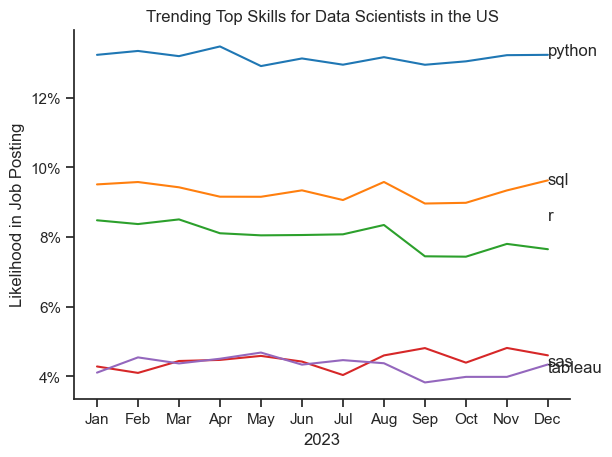

In [51]:
df_plot=df_DS_US_percentage.iloc[:,:5]

sns.set_theme(style='ticks')
sns.lineplot(data=df_plot,
             dashes=False,
             legend='full',
             palette='tab10')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Posting')
plt.title('Trending Top Skills for Data Scientists in the US')
plt.legend().remove()

ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

sns.despine()
# inside text
for i in range(5):
    plt.text(11,df_plot.iloc[0,i],df_plot.columns[i])